In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
dir_in_Lx = '../out/20.0909 Lx/L200only_reg_rf_boruta_all/'

df_conc_tr = pd.read_csv(os.path.join(dir_in_Lx, 'anlyz', 'concordance', 'concordance_tr.csv'))
df_conc_te = pd.read_csv(os.path.join(dir_in_Lx, 'anlyz', 'concordance', 'concordance_te.csv'))

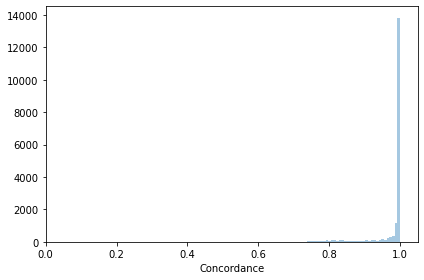

In [3]:
plt.figure()
ax = sns.distplot(df_conc_tr.concordance, kde=False)
ax.set(xlim=[0,1.05], xlabel='Concordance')
plt.tight_layout()

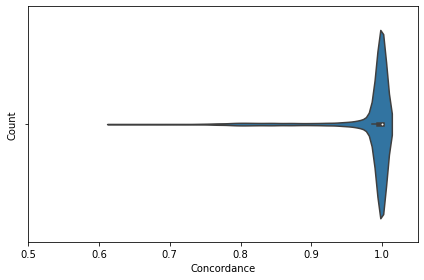

In [4]:
plt.figure()
ax = sns.violinplot(df_conc_tr.concordance)
#ax.set(xlim=[0,1.05], xlabel='Concordance')
ax.set(xlim=[0.5,1.05], xlabel='Concordance', ylabel='Count')
plt.tight_layout()

In [5]:
df1 = df_conc_tr['concordance'].to_frame().copy()
df1['dataset'] = 'train'
df2 = df_conc_te['concordance'].to_frame().copy()
df2['dataset'] = 'test'
df = pd.concat([df1,df2])
df['cat'] = 'one'

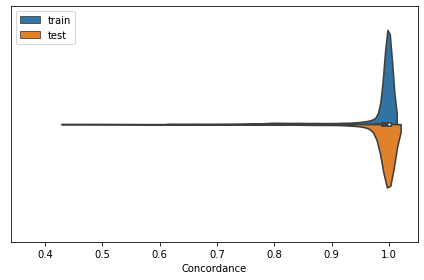

In [6]:
plt.figure()
ax = sns.violinplot(y='cat', x='concordance', hue='dataset', data=df, split=True, linewidth=1.6)
#ax.set(xlim=[0,1.05], xlabel='Concordance')
ax.set(xlim=[0.34,1.05], xlabel='Concordance', ylabel='', yticks=[])
ax.legend(loc='upper left')
plt.tight_layout()

Compare with Sanger

In [11]:
dir_in_Lx = '../out/20.0909 Lx/L200only_reg_rf_boruta_all/'
df_conc_te = pd.read_csv(os.path.join(dir_in_Lx, 'anlyz', 'concordance', 'concordance_te.csv'))

dir_in_Lx_sanger = '../out/20.0926 feat Sanger/reg_rf_boruta_gs16/'
df_conc_te_sanger = pd.read_csv(os.path.join(dir_in_Lx_sanger, 'anlyz', 'concordance', 'concordance_te.csv'))

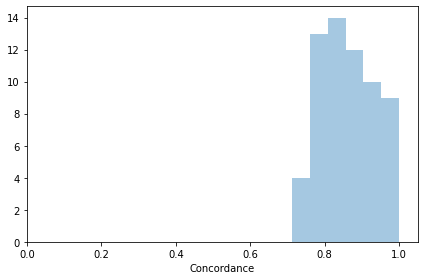

In [17]:
plt.figure()
ax = sns.distplot(df_conc_te_sanger.concordance, kde=False)
ax.set(xlim=[0,1.05], xlabel='Concordance')
plt.tight_layout()

In [13]:
df1 = df_conc_te['concordance'].to_frame().copy()
df1['dataset'] = 'Broad'
df2 = df_conc_te_sanger['concordance'].to_frame().copy()
df2['dataset'] = 'Sanger'
df = pd.concat([df1,df2])
df['cat'] = 'one'

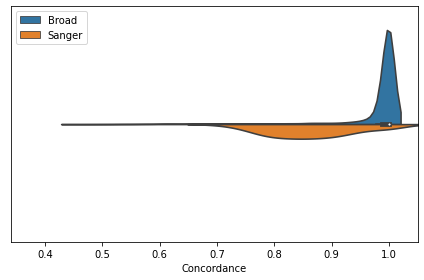

In [16]:
plt.figure()
ax = sns.violinplot(y='cat', x='concordance', hue='dataset', data=df, split=True, linewidth=1.6)
ax.set(xlim=[0.34,1.05], xlabel='Concordance', ylabel='', yticks=[])
ax.legend(loc='upper left')
plt.tight_layout()

Sanger/Broad compare - just on the common genes (the mitochondiral genes)

In [90]:
common_genes = set(df_conc_te_sanger['gene']).intersection(set(df_conc_te['gene']))

In [91]:
# match to genes in both datasets
df1 = df_conc_te.loc[df_conc_te['gene'].isin(common_genes), 'concordance'].to_frame().copy()
df1['dataset'] = 'Broad'
df2 = df_conc_te_sanger.loc[df_conc_te_sanger['gene'].isin(common_genes), 'concordance'].to_frame().copy()
df2['dataset'] = 'Sanger'
df = pd.concat([df1,df2])
df['cat'] = 'one'

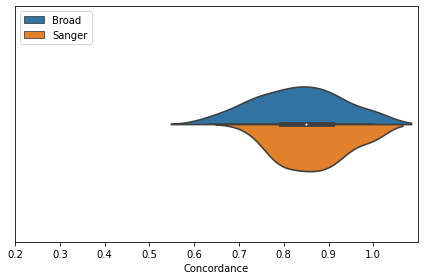

In [100]:
plt.figure()
ax = sns.violinplot(y='cat', x='concordance', hue='dataset', data=df, split=True, width=0.4, linewidth=1.6)
ax.set(xlim=[0.2,1.099], xlabel='Concordance', ylabel='', yticks=[])
ax.legend(loc='upper left')
plt.tight_layout()

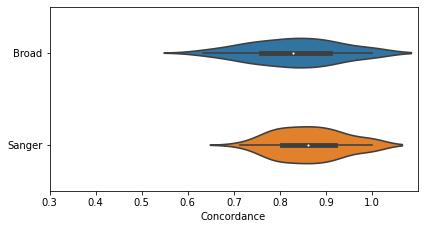

In [147]:
plt.figure()
ax = sns.violinplot(y='dataset', x='concordance', data=df, split=False, width=0.4, linewidth=1.6, dodge=False)
ax.set(xlim=[0.3,1.099], xlabel='Concordance', ylabel='')
ax.legend([],[], frameon=False)
ax.set_aspect(0.2)
plt.tight_layout()